In [4]:
set.seed(0)
X1 = rnorm(100,5,2)
X2 = rnorm(100,3,2)
X3 = rexp(100,10)
Y  = 2*rep(1,100) + 4*X1 + 3*X2 + rnorm(100,0,2)
tiempo = seq(1,100)
T = 5*exp(tiempo*(-0.1)+ rnorm(100,0,0.3)) 
# T = Aexp(Bt)
# Log(T) = Log(A) + Bt
data = data.frame(X1,X2,X3,Y,tiempo,T)
write.csv(data,'base_control_4.csv',row.names=FALSE)

In [5]:
data=read.csv('base_control_4.csv')
attach(data)

The following objects are masked _by_ .GlobalEnv:

    T, tiempo, X1, X2, X3, Y


The following objects are masked from data (pos = 3):

    T, tiempo, X1, X2, X3, Y


The following object is masked from package:base:

    T




Realice una regresión lineal simple con la estructura $$Y_i = \beta_0 + \beta_1 X1_i + \epsilon_i$$ Obtenga el limite inferior de un intervalo de confianza para $$\hat{\beta_0}$$ con una confianza de 0.95.

In [6]:
reg1=lm(Y~X1)
confint.lm(reg1)
# 4.944154

,2.5 %,97.5 %
(Intercept),4.944154,12.532447
X1,3.713205,5.133613


Considere el modelo de regresión multiple $$Y_i = \beta_0 + \beta_1 X1_i + \beta_2 X2_i + \epsilon_i$$ Suponga que se desea estimar cuanto vale Y si X1 = 2 y X2 = 3. Obtenga la estimación de Y

In [7]:
reg2 = lm(Y~X1+X2)
estimacion_Y = reg2$coef[1] + reg2$coef[2]*2 + reg2$coef[3]*3
print(estimacion_Y)

(Intercept) 
   19.18352 


Considere el siguiente modelo de regresión multiple
$$
Y_i = \beta_0 + \beta_1 X1_i + \beta_2 X2_i + \beta_3 X3_i
$$
Realice el test de hipotesis $$H_0: \beta_3 = 0$$ v/s $$H_1:\beta_3 \neq 0$$ y entregue como resultado el valor p (p-valor) asocioado al test.

In [8]:
reg3 = lm(Y~X1+X2+X3)
summary(reg3)
# 0.57140


Call:
lm(formula = Y ~ X1 + X2 + X3)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9371 -1.1715 -0.1637  1.3314  3.6559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.7601     0.6544   2.690  0.00843 ** 
X1            3.9916     0.1105  36.119  < 2e-16 ***
X2            3.1115     0.1010  30.796  < 2e-16 ***
X3            0.9946     1.7512   0.568  0.57140    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.925 on 96 degrees of freedom
Multiple R-squared:  0.9641,	Adjusted R-squared:  0.963 
F-statistic: 858.9 on 3 and 96 DF,  p-value: < 2.2e-16


En la base de datos, el par (tiempo,T), corresponde a la temperatura de un cuerpo en el tiempo indicado. Un experto dice que esto se modela mediante la ley:
$$
T = A*exp(B*tiempo)
$$
Realice una regresión lineal adecuadamente para predecir cuanto debería valer la temperatura si estamos en el tiempo 13.5

In [9]:
# T = Aexp(Bt)
# Log(T) = Log(A) + Bt
log_T = log(T)
reg4 = lm(log_T ~ tiempo)
prediccion = exp(reg4$coef[1])*exp(reg4$coef[2]*13.5)
prediccion

(Intercept) 
    1.29733

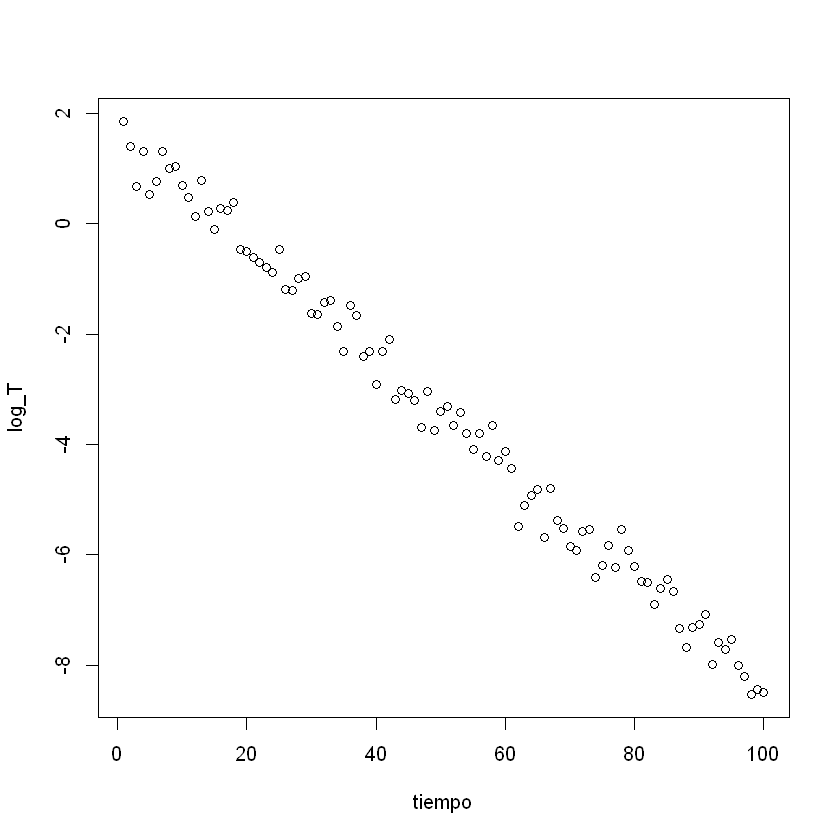

In [130]:
plot(tiempo,log_T)